<a href="https://colab.research.google.com/github/srfinley/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior)/prob_positive

In [2]:
prob_drunk_given_positive(.001,.08,1)

0.0125

In [6]:
def bayes(prior,sensitivity,specificity):
  return (sensitivity * prior)/((sensitivity * prior) + ((1-specificity) * (1-prior)))

bayes(.005,.99,.99)

0.33221476510067094

In [10]:
bayes(bayes(.005,.99,.99),.99,.99)

0.9800999999999999

In [9]:
import scipy.stats as stats

help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [11]:
data = [6, 9, 12, 7, 8, 8, 13]
stats.bayes_mvs(data)

(Mean(statistic=9.0, minmax=(7.103650222612533, 10.896349777387467)),
 Variance(statistic=10.0, minmax=(3.1767242068607078, 24.45910382133402)),
 Std_dev(statistic=2.9724954732045084, minmax=(1.7823367265645143, 4.945614605014631)))

In [0]:
import matplotlib.pyplot as plt
import numpy as np

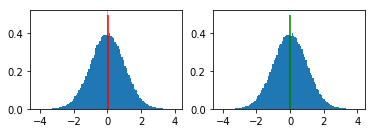

In [28]:
sample_size = 100_000
data = stats.norm.rvs(size=sample_size)

res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

fmean = np.mean(data)
stderr = stats.sem(data)
margin_of_error = stderr * stats.t.ppf((1 + .95) / 2.0, sample_size - 1)

fig = plt.figure()
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(data, bins=100, density=True, label='Histogram of data (Bayes)')
ax1.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax1.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (95% limits)')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(data, bins=100, density=True, label='Histogram of data (Frequentist)')
ax2.vlines(fmean,0,.5,colors='g',label='Sample mean')
ax1.axvspan(fmean - margin_of_error,fmean + margin_of_error, facecolor='g',
           alpha=0.2, label=r'Estimated mean (95% limits)')

plt.show();

In [29]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 21:13:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-18 21:13:14 (290 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'?':np.NaN, 'n':0, 'y':1})

dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

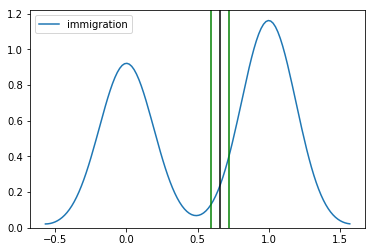

In [44]:
ax = sns.kdeplot(rep['immigration'].dropna())

ax.axvline(x=stats.bayes_mvs(rep['south-africa'].dropna())[0][1][0], color='g');
ax.axvline(x=stats.bayes_mvs(rep['south-africa'].dropna())[0][0], color='k');
ax.axvline(x=stats.bayes_mvs(rep['south-africa'].dropna())[0][1][1], color='g');

Bayesian statistics take into account baseline ("prior") probabilities of observations. Frequentist statistics do not.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)